### <strong>Goal</strong>: It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
#Run mutliple outputs on one code chunck
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

### Load Data

In [3]:
train_df = pd.read_csv(r'../data/raw/train.csv')
test_df = pd.read_csv(r'../data/raw/test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

In [4]:
train_df.shape
train_df.shape[1]/train_df.shape[0]

(1460, 81)

0.05547945205479452

Large number of features ~ 5% of rows. May need to explore dimension reduction 

#### Missing Values Check

<Figure size 2000x500 with 0 Axes>

Text(0.5, 1.0, 'Heatmap of missing values in data')

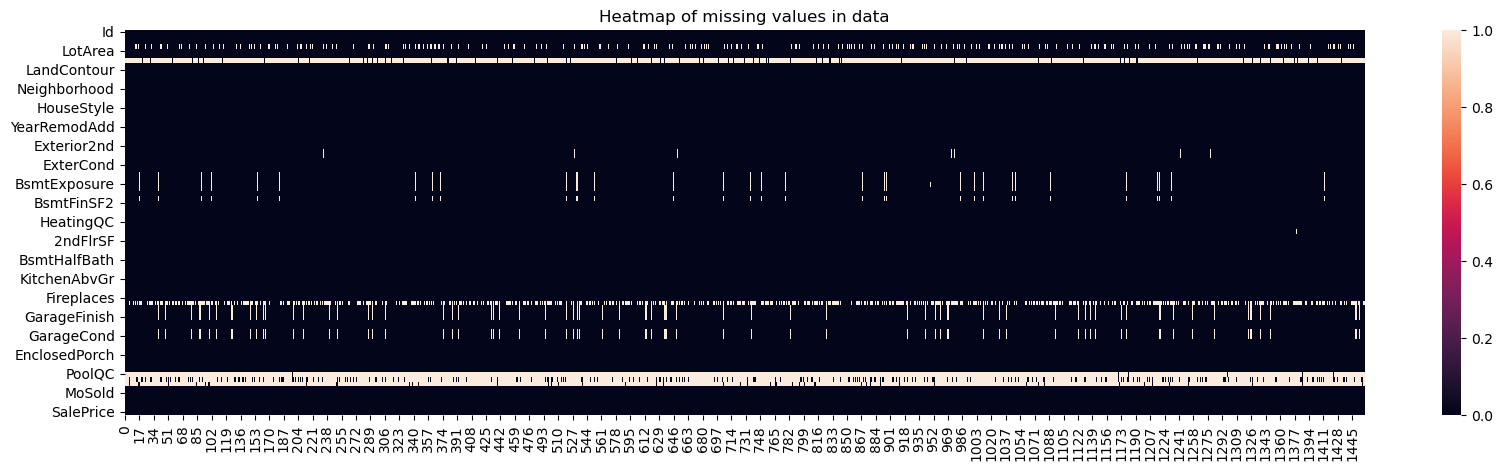

In [5]:
plt.figure(figsize=(20,5))
sns.heatmap(train_df.isna().transpose()).set_title('Heatmap of missing values in data')

<AxesSubplot:xlabel='Null_percentage', ylabel='Count'>

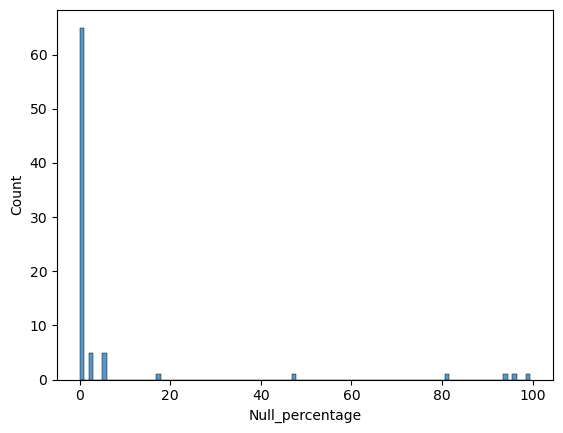

In [6]:
null_df = train_df.isna().sum().reset_index()  
null_df.columns = ['Features', 'Null_count']
null_df['Null_percentage'] = (null_df['Null_count']/train_df.shape[0])*100
sns.histplot(null_df['Null_percentage'], bins=100)
plt.show()

In [7]:
null_df = null_df[null_df['Null_percentage']>0].sort_values(by = 'Null_percentage', ascending= False).reset_index(drop=True)
null_df

,Features,Null_count,Null_percentage
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,FireplaceQu,690,47.260274
5,LotFrontage,259,17.739726
6,GarageType,81,5.547945
7,GarageYrBlt,81,5.547945
8,GarageFinish,81,5.547945
9,GarageQual,81,5.547945


After inspecting features with missing values in data description, most NA values can be interpreted as valid datapoints (I.e. NA in Alley refers to no alley access). <br>
Below is the method/value that each missing value for all feauture will be imputed: <br>
- For categorical feature where NA value makes sense, will replace NaN with N/A else will mode impute:
- For numeric values, mean impute
- For features with very few missing values, drop rows

May consider removing features if model performance is poor: <br>
- PoolQC, MiscFeatures, Alley and Fence as there is a lot of missing values hence adding noise to model <br>


In [5]:
train_df_v2 = train_df.copy()

# Rows dropped
train_df_v2.dropna(subset = 'Electrical', axis=0, inplace=True)
test_df.dropna(subset = 'Electrical', axis=0, inplace=True)

# Rows dropped only if all missing
train_df_v2.dropna(subset=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], axis = 0, how= 'all', inplace= True)
test_df.dropna(subset=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], axis = 0, how= 'all', inplace= True)

#### Datatypes

In [6]:
# Extract/Convert numeric features
numeric_features = train_df_v2.select_dtypes(include="number").columns
numeric_features = numeric_features.drop(labels=["Id", "SalePrice", "MSSubClass"])

In [7]:
# Extract/Convert categorical features
categorical_features = list(train_df_v2.select_dtypes(include='object').columns)
categorical_features.append("MSSubClass")

In [8]:
# Missing features list
categorical_na = ["Alley","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                  "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                   "PoolQC", "Fence", "MiscFeature" ]
categorical_mode_impute = list(set(categorical_features) -  set(categorical_na))

In [9]:
# Numerical Features Imputed
mean_imputer = SimpleImputer(strategy='mean')
mean_imputer.fit(train_df_v2[numeric_features])
train_df_v2[numeric_features] = mean_imputer.transform(train_df_v2[numeric_features])
test_df[numeric_features] = mean_imputer.transform(test_df[numeric_features])

SimpleImputer()

In [10]:
# Categorical Features Mode Imputer
mode_imputer = SimpleImputer(strategy="most_frequent")
mode_imputer.fit(train_df_v2[categorical_mode_impute])
train_df_v2[categorical_mode_impute] = mode_imputer.transform(train_df_v2[categorical_mode_impute])
test_df[categorical_mode_impute] = mode_imputer.transform(test_df[categorical_mode_impute])

SimpleImputer(strategy='most_frequent')

In [11]:
# Categorical Features N/A Imputer
na_imputer = SimpleImputer(strategy="constant", fill_value="N/A")
na_imputer.fit(train_df_v2[categorical_na])
train_df_v2[categorical_na] = na_imputer.transform(train_df_v2[categorical_na])
test_df[categorical_na] = na_imputer.transform(test_df[categorical_na])

SimpleImputer(fill_value='N/A', strategy='constant')

In [12]:
for feature in categorical_features:
    train_df_v2[feature] = train_df_v2[feature].astype('category')
    test_df[feature] = test_df[feature].astype('category')

In [13]:
# Reset index
train_df_v2.reset_index(inplace=True, drop=True)
test_df.reset_index(inplace=True, drop=True)

#### Numerical data distribution

##### Target

Text(0.5, 1.0, 'Target (SalesPrice) Distribution')

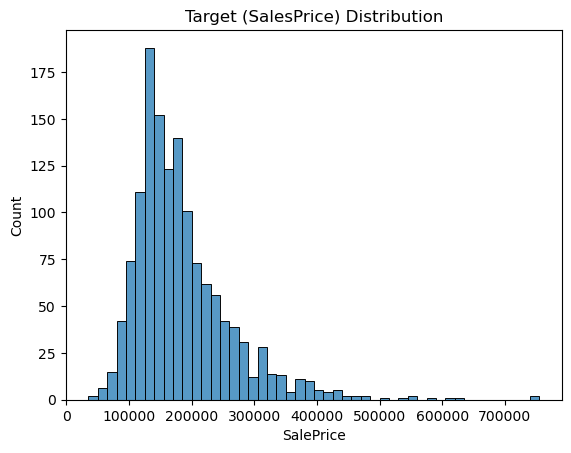

count      1378.000000
mean     185492.558781
std       79051.093697
min       35311.000000
25%      134000.000000
50%      167700.000000
75%      217875.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
sns.histplot(x = "SalePrice", data = train_df_v2).set_title("Target (SalesPrice) Distribution")
plt.show()
train_df_v2['SalePrice'].describe()

##### Numeric Features

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfB

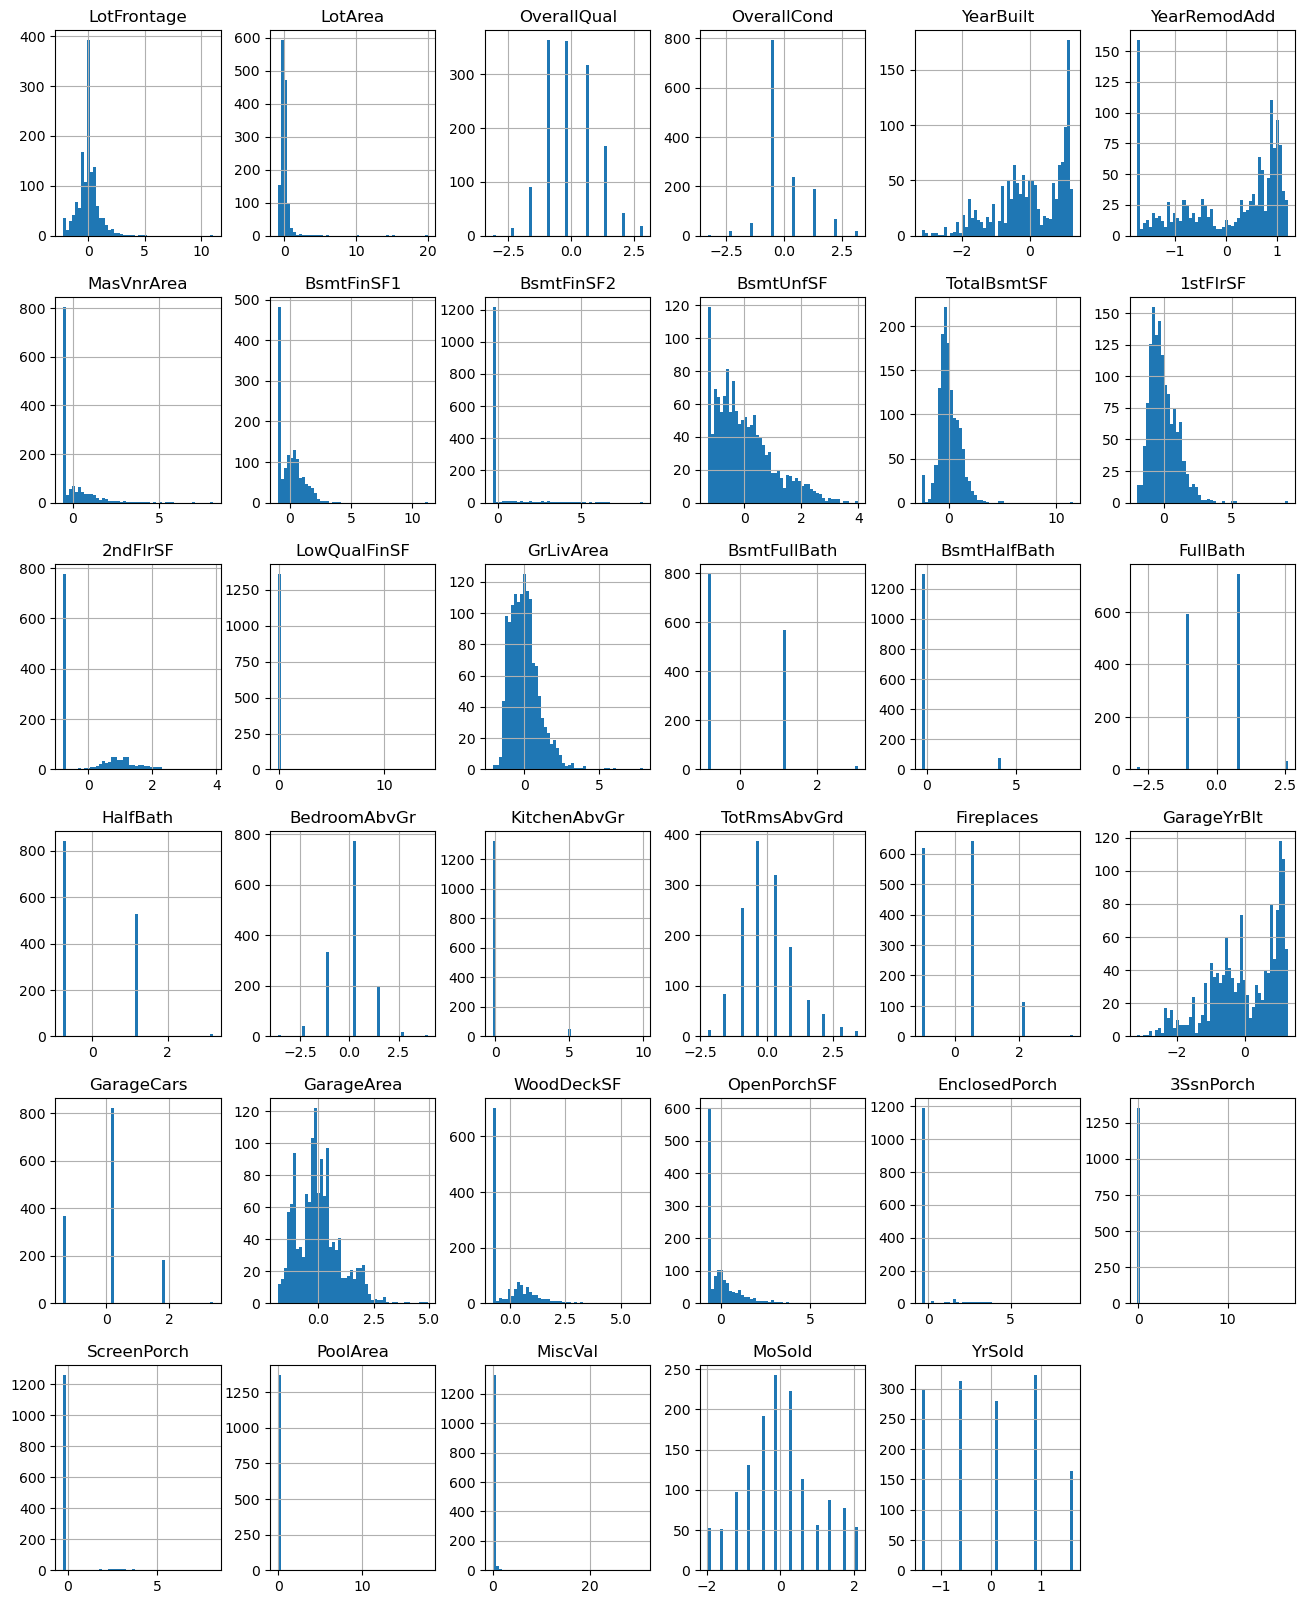

In [172]:
train_df_v2[numeric_features].hist(bins = 50, figsize = (16,20))
plt.show()

#### Duplicates

In [111]:
# Duplicated rows
duplicate_rows = train_df_v2.duplicated(train_df_v2.columns.difference(['Id']))
print(f"Number of duplicated rows: {train_df_v2[duplicate_rows].shape[0]}")

# Duplicated columns
duplicate_cols = train_df_v2.T.duplicated()
print(f"Number of duplicated columns: {print(train_df_v2.loc[:, duplicate_cols].shape[1])}")


Number of duplicated rows: 0
0
Number of duplicated columns: None


#### Collinearity

In [57]:
corr_matrix = train_df_v2.corr()

<Figure size 2000x1500 with 0 Axes>

<AxesSubplot:>

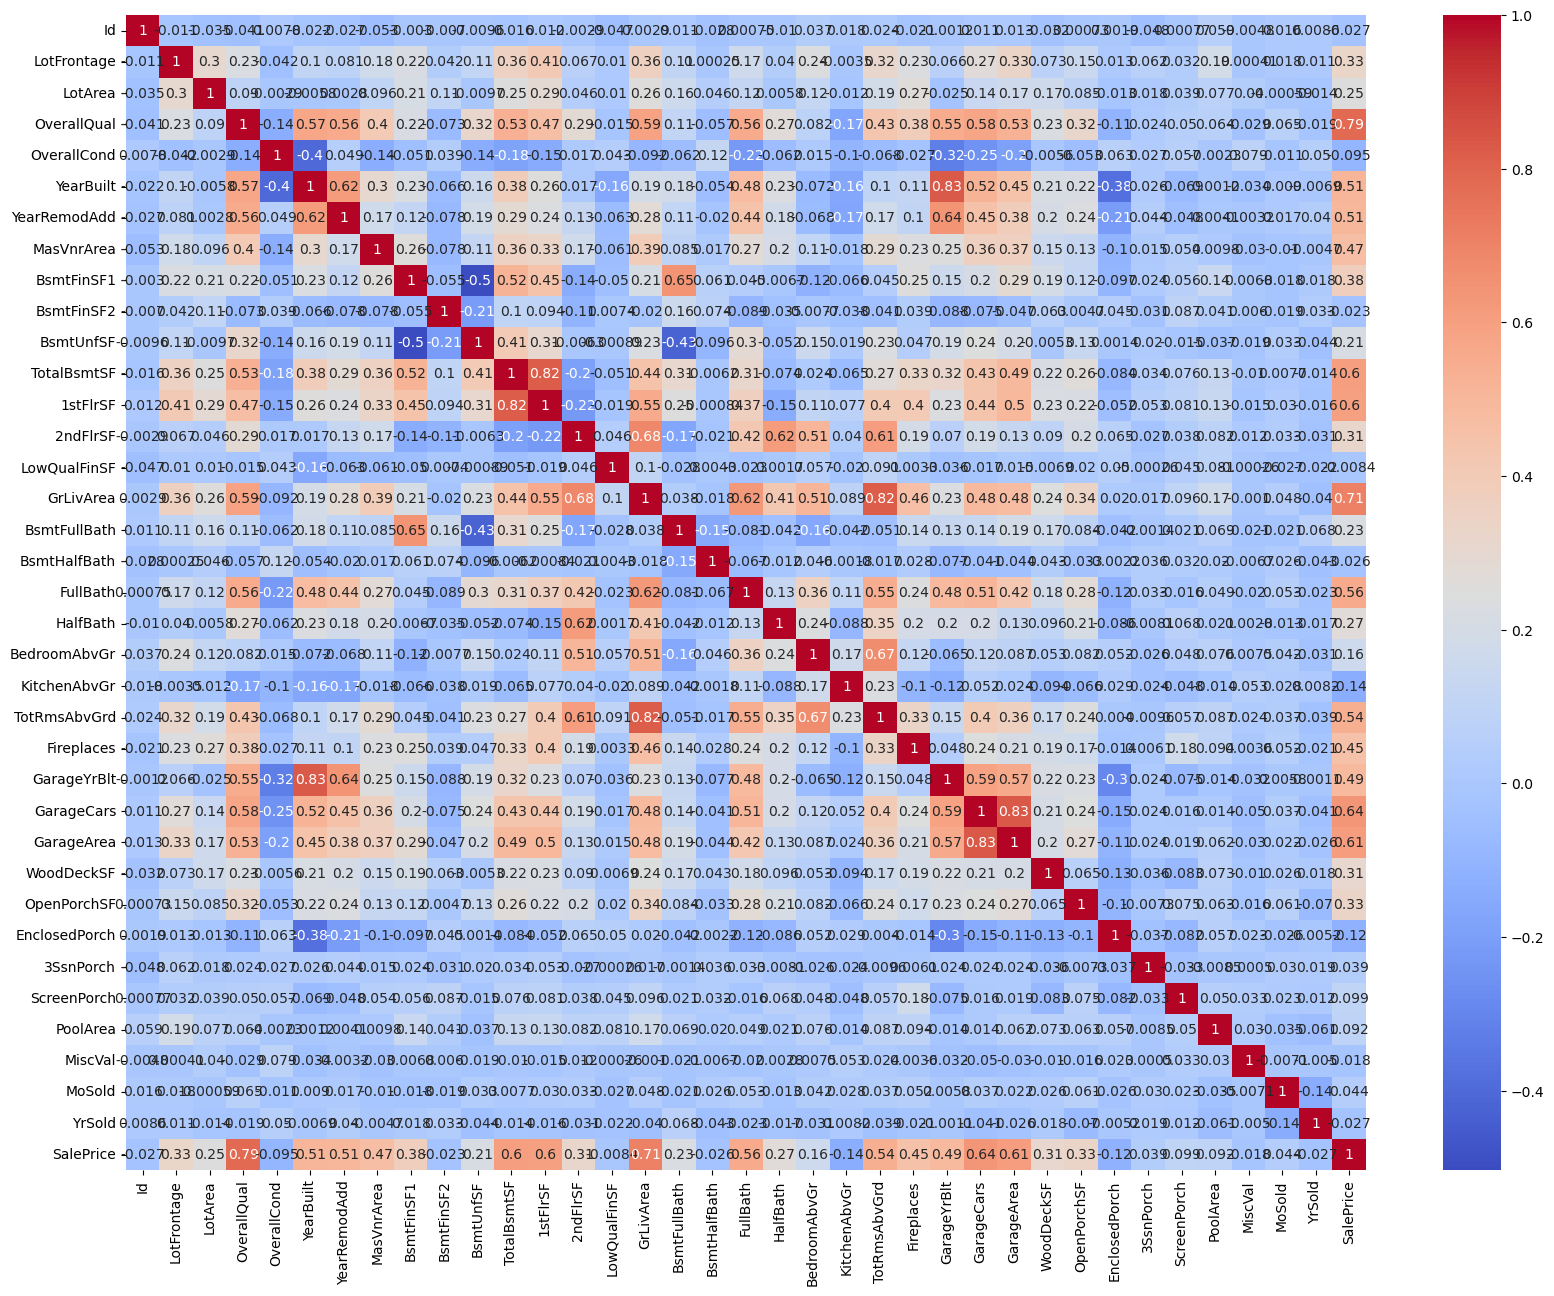

In [58]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Not concerned about collinearity of features. If model has low performance, may consider removing GarageYrBuilt as hghly correlated with Yearbuilt feature & TotRmsAbvGrd as highly correlated with GrLivArea

#### Scale and Centre Numeric Features <br>

In [15]:
# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the numerical features
scaler.fit(train_df_v2[numeric_features])

# transform the numerical features using the scaler
train_df_v2[numeric_features] = scaler.transform(train_df_v2[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])


StandardScaler()

#### Outliers

<Figure size 1500x500 with 0 Axes>

<AxesSubplot:>

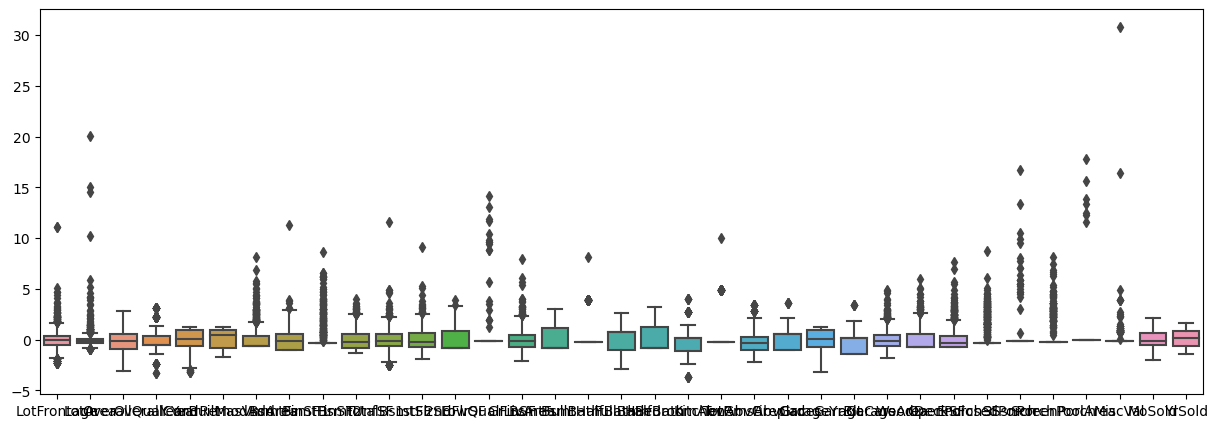

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(data= train_df_v2[numeric_features])

May consider removing outliers using IQR method is poor model fit

#### Re-encode categorical features

In [18]:
# Perform one-hot encoding using pandas
train_df_v3 = pd.get_dummies(train_df_v2, drop_first=True)
test_df_v2 = pd.get_dummies(test_df, drop_first=True)

#### Model Evaluation

In [141]:
train_df_v3.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N/A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_N/A,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_N/A,MiscFeature_N/A,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.259045,-0.219930,0.603572,-0.535077,1.023800,0.860249,0.472447,0.544235,-0.292948,-0.948724,-0.502201,-0.830915,1.139476,-0.103111,0.337506,1.107058,-0.246689,0.766834,1.203852,0.172176,-0.196187,0.910663,-0.994552,0.993384,0.205021,0.254037,-0.769184,0.209967,-0.347820,-0.119799,-0.278738,-0.070716,-0.085564,-1.607778,0.141296,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,0.424912,-0.107347,-0.139701,2.240340,0.104382,-0.460911,-0.592854,1.136147,-0.292948,-0.646683,0.429045,0.218596,-0.803706,-0.103111,-0.525482,-0.838766,3.950067,0.766834,-0.787634,0.172176,-0.196187,-0.347376,0.554027,-0.100718,0.205021,-0.219946,1.582844,-0.725645,-0.347820,-0.119799,-0.278738,-0.070716,-0.085564,-0.495198,-0.610464,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,-0.122254,0.054186,0.603572,-0.535077,0.955695,0.811317,0.287650,0.065482,-0.292948,-0.308578,-0.355403,-0.665475,1.166781,-0.103111,0.483906,1.107058,-0.246689,0.766834,1.203852,0.172176,-0.196187,-0.347376,0.554027,0.912339,0.205021,0.577208,-0.769184,-0.081453,-0.347820,-0.119799,-0.278738,-0.070716,-0.085564,0.988243,0.141296,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,-0.487031,-0.112241,0.603572,-0.535077,-1.972823,-0.754502,-0.592854,-0.522078,-0.292948,-0.069651,-0.731572,-0.559490,0.916488,-0.103111,0.350990,1.107058,-0.246689,-1.058204,-0.787634,0.172176,-0.196187,0.281644,0.554027,0.790773,1.792208,0.760337,-0.769184,-0.188819,4.145637,-0.119799,-0.278738,-0.070716,-0.085564,-1.607778,-1.362224,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,0.607301,0.348860,1.346846,-0.535077,0.921643,0.713453,1.309469,0.433251,-0.292948,-0.182353,0.160681,-0.083849,1.592278,-0.103111,1.277546,1.107058,-0.246689,0.766834,1.203852,1.447763,-0.196187,1.539683,0.554027,0.871817,1.792208,1.805254,0.746216,0.562738,-0.347820,-0.119799,-0.278738,-0.070716,-0.085564,2.100823,0.141296,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [19]:
# Defining target and features
X_train, X_val, y_train, y_val = train_test_split(train_df_v3.drop(columns=['Id', 'SalePrice']), train_df_v3['SalePrice'], test_size=0.25, random_state=2023)
X_test = test_df_v2.drop(columns=['Id'])

In [20]:
# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=2023)

# Specify the scoring metrics as a list
scoring_metrics = ['neg_mean_squared_error', 'r2']

In [28]:
def evaluate_model(model_name, X_train, y_train, X_val, y_val):
    model_name.fit(X_train, y_train)
    y_pred = model_name.predict(X_val)

    # Calculate root mean squared error (RMSE)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_val, y_pred)
    # Calculate R-squared (R²) score
    r2 = r2_score(y_val, y_pred)
    print("---------------------------------")
    print("Results")
    print(f"RMSE: {rmse} | MAE: {mae} | r2: {r2}")
    print("---------------------------------")
    
    # Plotting the predicted values vs actual values
    plt.scatter(y_val, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{str(model_name)}: Actual vs Predicted')
    plt.show()

### Linear Regression

In [22]:
# Create a linear regression model and calculate its cross-validation score
lr_model = LinearRegression()
lr_scores = cross_validate(lr_model, X_train, y_train, cv=kf, scoring=scoring_metrics)

In [23]:
lr_scores['test_neg_mean_squared_error'].mean()
lr_scores['test_r2'].mean()

-1.6472861327714738e+30

-2.942809765507024e+20

---------------------------------
Results
RMSE: 180990189196653.3 | MAE: 19072357672926.465 | r2: -4.2546958453316705e+18
---------------------------------


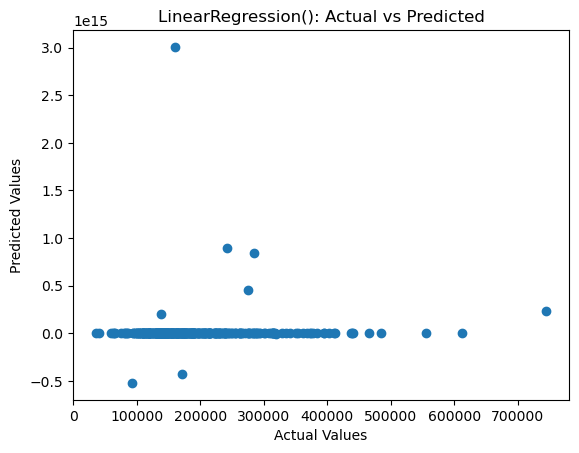

In [202]:
evaluate_model(lr_model, X_train, y_train, X_val, y_val)

### Polynomial Regression

In [152]:
# Create a polynomial regression model and calculate its cross-validation score
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
])
poly_scores = cross_validate(poly_model, X_train, y_train, cv=kf, scoring=scoring_metrics)

In [153]:
poly_scores['test_neg_mean_squared_error'].mean()
poly_scores['test_r2'].mean()

-1432731181.391479

0.730558399201099

---------------------------------
Results
RMSE: 31927.35558008218 | MAE: 21900.503086566772 | r2: 0.8676011084045446
---------------------------------


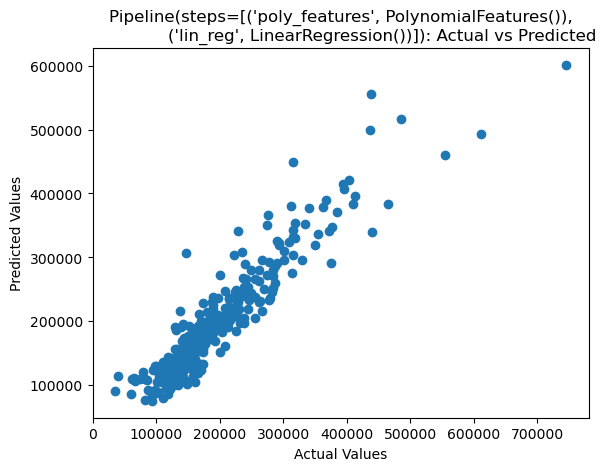

In [200]:
evaluate_model(poly_model, X_train, y_train, X_val, y_val)

### Ridge Regression

In [29]:
# Create a ridge regression model and calculate its cross-validation score
ridge_model = Ridge(alpha=0.5)
ridge_scores = cross_validate(ridge_model, X_train, y_train, cv=kf, scoring=scoring_metrics)

In [30]:
ridge_scores['test_neg_mean_squared_error'].mean()
ridge_scores['test_r2'].mean()

-1230656395.6832623

0.7631784906479879

---------------------------------
Results
RMSE: 44717.17513398302 | MAE: 21456.730800114034 | r2: 0.740278936654488
---------------------------------


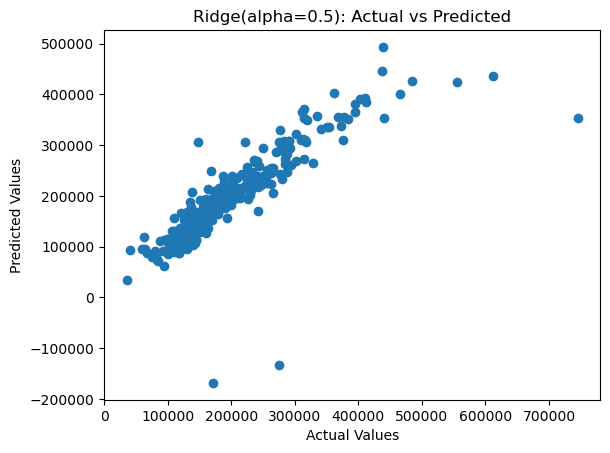

In [34]:
evaluate_model(ridge_model, X_train, y_train, X_val, y_val)

### Lasso Regression

In [35]:
# Create a lasso regression model and calculate its cross-validation score
lasso_model = Lasso(alpha=0.5)
lasso_scores = cross_validate(lasso_model, X_train, y_train, cv=kf, scoring=scoring_metrics)

/Users/uni/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.698e+10, tolerance: 5.304e+08
  model = cd_fast.enet_coordinate_descent(
/Users/uni/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+11, tolerance: 4.951e+08
  model = cd_fast.enet_coordinate_descent(
/Users/uni/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

---------------------------------
Results
RMSE: 59607.49957016696 | MAE: 22351.895769982864 | r2: 0.5385121623891256
---------------------------------


/Users/uni/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+11, tolerance: 5.937e+08
  model = cd_fast.enet_coordinate_descent(


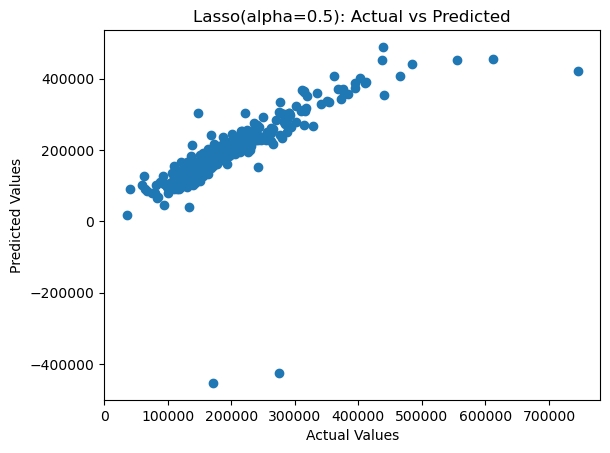

In [37]:
evaluate_model(lasso_model, X_train, y_train, X_val, y_val)

### ElasticNet

In [39]:
# Create an elastic net regression model and calculate its cross-validation score
en_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
en_scores = cross_validate(en_model, X_train, y_train, cv=kf, scoring=scoring_metrics)

In [40]:
en_scores['test_neg_mean_squared_error'].mean()
en_scores['test_r2'].mean()

-1298079384.8528767

0.759893890552025

---------------------------------
Results
RMSE: 39526.52358998858 | MAE: 21503.80711510757 | r2: 0.7970749369150385
---------------------------------


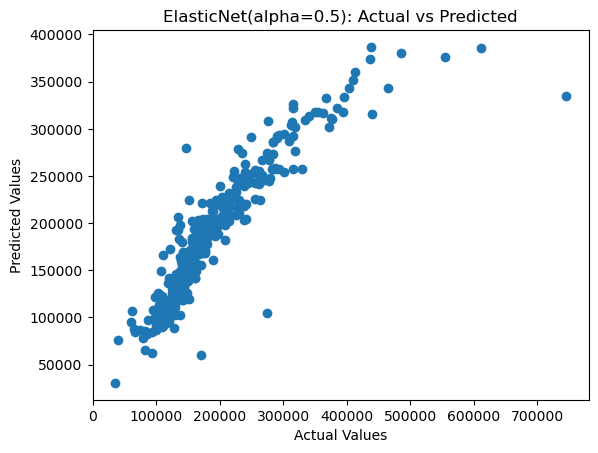

In [41]:
evaluate_model(en_model, X_train, y_train, X_val, y_val)